In [1]:
import os
import re
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import fetch_20newsgroups
#from tensorflow.keras import layers
from keras import layers
from sklearn.model_selection import train_test_split
#from tensorflow.keras.models import Sequential
from keras.models import Sequential
#from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout
#from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D

In [2]:
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv('webmd.csv')

In [4]:
df.shape

(362806, 12)

In [5]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [6]:
report=['Condition','Reviews']

In [7]:

df['report'] =df[report].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,report
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,Stuffy Nose_I'm a retired physician and of all...
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,Cold Symptoms_cleared me right up even with my...
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,Other_why did my PTINR go from a normal of 2.5...
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,Other_FALLING AND DON'T REALISE IT
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,Other_My grandfather was prescribed this medic...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2,Stop Smoking_I took the whole 12 weeks.I could...
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16,Other_My dad strated taking Chantix about 1 mo...
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3,"Stop Smoking_As long as I was on chantix, I di..."
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1,Stop Smoking_Started this medication Oct 5th 2...


In [8]:

df_train = df.drop(['Age','Condition','Date','Drug','DrugId','EaseofUse','Effectiveness','Sex','Sides','UsefulCount','Reviews'],axis=1)
df_train .head(10)

,Satisfaction,report
0,5,Stuffy Nose_I'm a retired physician and of all...
1,5,Cold Symptoms_cleared me right up even with my...
2,3,Other_why did my PTINR go from a normal of 2.5...
3,1,Other_FALLING AND DON'T REALISE IT
4,1,Other_My grandfather was prescribed this medic...
5,4,Other_help heart condition operation well
6,2,Birth Control_Haven't gotten pregnant so it do...
7,5,Disease of Ovaries with Cysts_I have take this...
8,2,Acne_
9,2,Stuffy Nose_The 12 hour spray only works for m...


In [9]:
def clean_text (text):
    # Remove Pre and Post Spaces
    text = str(text).strip()
    
    # Lower case the entire text
    text = str(text).lower()

    # Substitute New Line Characters with spaces 
    text = re.sub(r"\n", r" ", text)
        
    # Tokenize the sentence
    word_tokens = word_tokenize(text)
    
    # Remove the punctuation and  special characters from each individual word
    cleaned_text = []
    for word in word_tokens:
        cleaned_text.append("".join([char for char in word if char.isalnum()]))
    
    # Specify the stop words list
    stop_words = stopwords.words('english')
    
    # Remove the stopwords and words containing less then 2 characters
    text_tokens = [word for word in cleaned_text if (len(word) > 2) and (word not in stop_words)]
    
    #Lemmatize each word in the word list
    text = lemmatize (text_tokens)
    
    return text

In [10]:
def get_wordnet_pos (tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [11]:
def lemmatize (word_list):
    wl = WordNetLemmatizer()
    word_pos_tags = pos_tag(word_list)
    lemmatized_list = []
    for tag in word_pos_tags:
        lemmatize_word = wl.lemmatize(tag[0],get_wordnet_pos(tag[1]))
        lemmatized_list.append(lemmatize_word)
    return " ".join(lemmatized_list)

In [12]:
df_train['report'] = df_train['report'].apply(lambda x: clean_text(x))

In [13]:
df_train['Satisfaction']

0         5
1         5
2         3
3         1
4         1
         ..
362801    5
362802    1
362803    2
362804    5
362805    5
Name: Satisfaction, Length: 362806, dtype: int64

In [14]:
def map_rating_to_class(rating):
    if rating >= 4:
        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create a new column 'rating_class' in the DataFrame
# Apply the function to create a new column 'class' in the DataFrame using .loc[row_indexer, col_indexer]
df_train.loc[:, 'Satisfaction'] = df_train['Satisfaction'].apply(map_rating_to_class)

#print(df.head(10))

In [15]:

df_train['Satisfaction'] 

0         positive
1         positive
2          neutral
3         negative
4         negative
            ...   
362801    positive
362802    negative
362803    negative
362804    positive
362805    positive
Name: Satisfaction, Length: 362806, dtype: object

In [16]:
Sentiment_train = df_train['Satisfaction']
Report_train = df_train['report']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(Report_train, Sentiment_train, test_size=0.25)


In [18]:
from numpy import array
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# One-Hot Encoding of Sentiment_Train
Sentiment_train = array(Sentiment_train)
# integer encode
label_encoder = LabelEncoder()
Sentiment_train_integer_encoded = label_encoder.fit_transform(Sentiment_train)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
Sentiment_train_integer_encoded = Sentiment_train_integer_encoded.reshape(len(Sentiment_train_integer_encoded), 1)
Sentiment_train_onehot_encoded = onehot_encoder.fit_transform(Sentiment_train_integer_encoded)
# One-Hot Encoding of Sentiment_Test
Sentiment_test = array( y_test)
# integer encode
label_encoder = LabelEncoder()
Sentiment_test_integer_encoded = label_encoder.fit_transform(y_test)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
Sentiment_test_integer_encoded = Sentiment_test_integer_encoded.reshape(len(Sentiment_test_integer_encoded), 1)
Sentiment_test_onehot_encoded = onehot_encoder.fit_transform(Sentiment_test_integer_encoded)
print("Sentiment_Train shape after one-hot encoding : ",Sentiment_train_onehot_encoded.shape,"  "
     ,"Sentiment_Test shape after one-hot encoding : ",Sentiment_test_onehot_encoded.shape,"\n")

Sentiment_Train shape after one-hot encoding :  (362806, 3)    Sentiment_Test shape after one-hot encoding :  (90702, 3) 



In [19]:
# Tokenize and Create Sequence For Train set
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(Report_train)
Report_train_sequences = tokenizer.texts_to_sequences(Report_train)
Report_train_padded = pad_sequences(Report_train_sequences, maxlen=100, padding='post', truncating='post')             # maxlen is the size of words in a review here it is 100
# Tokenize and Create Sequence For Test set
Report_test_sequences = tokenizer.texts_to_sequences(X_test)
Report_test_padded = pad_sequences(Report_test_sequences, maxlen=100, padding='post', truncating='post')
print("Report_Train shape after padding : ",Report_train_padded.shape,"  ","Report_Test shape after padding: ",Report_test_padded.shape)
Sentiment_labels = ['Negative', 'Neutral', 'Positive']    

Report_Train shape after padding :  (362806, 100)    Report_Test shape after padding:  (90702, 100)


In [20]:
vocab_size = len(tokenizer.index_word) + 1
vocab_size 

173004

In [21]:
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint_filepath = os.getcwd()
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)
callbacks = [EarlyStopping(patience=2), model_checkpoint_callback]

# LSTM

In [29]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.layers import Embedding, Conv1D, LSTM, Dense, Dropout
LSTM_model = Sequential()
sequence_len=100
LSTM_model.add(layers.Embedding(input_dim=vocab_size, output_dim=100, input_length=sequence_len))
LSTM_model.add(SpatialDropout1D(0.3))
LSTM_model.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)))
LSTM_model.add(Dense(1024, activation="relu"))
LSTM_model.add(Dropout(0.8))
LSTM_model.add(Dense(1024, activation="relu"))
LSTM_model.add(Dropout(0.8))
LSTM_model.add(Dense(3))
LSTM_model.add(Activation("softmax"))
LSTM_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(LSTM_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          17300400  
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 100)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 1024)              205824    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [31]:
history_LSTM = LSTM_model.fit(Report_train_padded,Sentiment_train_onehot_encoded, epochs=5, batch_size=128, validation_data=(Report_test_padded, Sentiment_test_onehot_encoded))



Epoch 1/5
2835/2835 [==============================] - 11051s 4s/step - loss: 0.7586 - accuracy: 0.6877 - val_loss: 0.7059 - val_accuracy: 0.7032
Epoch 2/5
2835/2835 [==============================] - 12560s 4s/step - loss: 0.7341 - accuracy: 0.6971 - val_loss: 0.6766 - val_accuracy: 0.7187
Epoch 3/5
2835/2835 [==============================] - 10710s 4s/step - loss: 0.7117 - accuracy: 0.7063 - val_loss: 0.6506 - val_accuracy: 0.7301
Epoch 4/5
2835/2835 [==============================] - 14766s 5s/step - loss: 0.6941 - accuracy: 0.7141 - val_loss: 0.6409 - val_accuracy: 0.7356
Epoch 5/5
2835/2835 [==============================] - 12922s 5s/step - loss: 0.6771 - accuracy: 0.7228 - val_loss: 0.6186 - val_accuracy: 0.7447


In [32]:
import time
import itertools
import warnings
from sklearn.metrics import confusion_matrix
# Model Evaluation on Test data
test_loss,test_acc = LSTM_model.evaluate(Report_test_padded, Sentiment_test_onehot_encoded)
print("\n Evaluated model accuracy on test data :",test_acc)
seconds= time.time()
time_stop = time.ctime(seconds)
print("\n","stop time:", time_stop,"\n")
# Predict the values from the Test dataset
Sentiment_pred = LSTM_model.predict(Report_test_padded)
# Convert predictions classes to one hot vectors
Sentiment_pred_classes = np.argmax(Sentiment_pred,axis = 1)
# computing the confusion matrix

2835/2835 [==============================] - 186s 66ms/step - loss: 0.6186 - accuracy: 0.7447

 Evaluated model accuracy on test data : 0.7446804046630859

 stop time: Sat May  6 00:55:54 2023 

2835/2835 [==============================] - 137s 48ms/step


In [33]:
confusion_mtx = confusion_matrix(Sentiment_test_integer_encoded, Sentiment_pred_classes)
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [34]:
#Printing Classification Report for Sentiment
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(Sentiment_test_integer_encoded, Sentiment_pred_classes, target_names = Sentiment_labels))
accuracy = accuracy_score(Sentiment_test_integer_encoded, Sentiment_pred_classes)
print('Accuracy: %f' % accuracy)
cohen_score = cohen_kappa_score(Sentiment_test_integer_encoded, Sentiment_pred_classes)
print('Cohen_score: %f' % cohen_score)

              precision    recall  f1-score   support

    Negative       0.76      0.80      0.78     34095
     Neutral       0.68      0.04      0.08     12898
    Positive       0.73      0.91      0.81     43709

    accuracy                           0.74     90702
   macro avg       0.72      0.58      0.56     90702
weighted avg       0.74      0.74      0.70     90702

Accuracy: 0.744680
Cohen_score: 0.546443


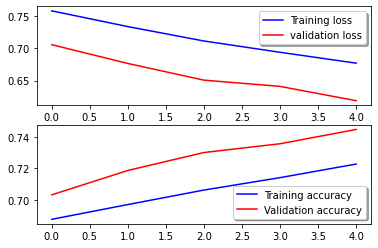

In [35]:

# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history_LSTM .history['loss'], color='b', label="Training loss")
ax[0].plot(history_LSTM .history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history_LSTM .history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_LSTM .history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

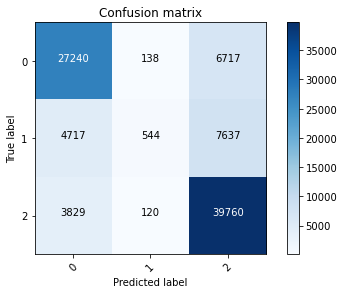

In [36]:
# Defining function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

# LSTM_CNN

In [37]:
# Build the CNN-LSTM model
modelCNN_LSTM = Sequential()
modelCNN_LSTM.add(layers.Embedding(input_dim=vocab_size, output_dim=100, input_length=sequence_len ))
modelCNN_LSTM.add(Conv1D(64, 5, activation='relu'))
modelCNN_LSTM.add(MaxPooling1D(pool_size=4))
modelCNN_LSTM.add(LSTM(64))
modelCNN_LSTM.add(Dense(len(label_encoder.classes_), activation='softmax'))
# Compile the model
modelCNN_LSTM.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(modelCNN_LSTM.summary())
# Train the model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          17300400  
                                                                 
 conv1d (Conv1D)             (None, 96, 64)            32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 64)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 17,365,683
Trainable params: 17,365,683
Non-trainable params: 0
__________________________________________

In [39]:
history_LSTM_CNN= modelCNN_LSTM.fit(Report_train_padded,Sentiment_train_onehot_encoded, epochs=5, batch_size=128, validation_data=(Report_test_padded, Sentiment_test_onehot_encoded))



Epoch 1/5
2835/2835 [==============================] - 593s 209ms/step - loss: 0.7701 - accuracy: 0.6784 - val_loss: 0.6859 - val_accuracy: 0.7179
Epoch 2/5
2835/2835 [==============================] - 601s 212ms/step - loss: 0.6608 - accuracy: 0.7295 - val_loss: 0.5562 - val_accuracy: 0.7820
Epoch 3/5
2835/2835 [==============================] - 606s 214ms/step - loss: 0.5668 - accuracy: 0.7728 - val_loss: 0.4741 - val_accuracy: 0.8150
Epoch 4/5
2835/2835 [==============================] - 610s 215ms/step - loss: 0.4792 - accuracy: 0.8126 - val_loss: 0.3936 - val_accuracy: 0.8537
Epoch 5/5
2835/2835 [==============================] - 593s 209ms/step - loss: 0.4101 - accuracy: 0.8421 - val_loss: 0.3414 - val_accuracy: 0.8747


In [40]:
import time
import itertools
import warnings
from sklearn.metrics import confusion_matrix
# Model Evaluation on Test data
test_loss,test_acc =modelCNN_LSTM.evaluate(Report_test_padded, Sentiment_test_onehot_encoded)
print("\n Evaluated model accuracy on test data :",test_acc)
seconds= time.time()
time_stop = time.ctime(seconds)
print("\n","stop time:", time_stop,"\n")
# Predict the values from the Test dataset
Sentiment_pred = modelCNN_LSTM.predict(Report_test_padded)
# Convert predictions classes to one hot vectors
Sentiment_pred_classes = np.argmax(Sentiment_pred,axis = 1)
# computing the confusion matrix

2835/2835 [==============================] - 35s 12ms/step - loss: 0.3414 - accuracy: 0.8747

 Evaluated model accuracy on test data : 0.8746665120124817

 stop time: Sat May  6 01:59:02 2023 

2835/2835 [==============================] - 32s 11ms/step


In [41]:
confusion_mtx = confusion_matrix(Sentiment_test_integer_encoded, Sentiment_pred_classes)
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [42]:
#Printing Classification Report for Sentiment
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(Sentiment_test_integer_encoded, Sentiment_pred_classes, target_names = Sentiment_labels))
accuracy = accuracy_score(Sentiment_test_integer_encoded, Sentiment_pred_classes)
print('Accuracy: %f' % accuracy)
cohen_score = cohen_kappa_score(Sentiment_test_integer_encoded, Sentiment_pred_classes)
print('Cohen_score: %f' % cohen_score)

              precision    recall  f1-score   support

    Negative       0.90      0.89      0.90     34095
     Neutral       0.83      0.55      0.66     12898
    Positive       0.86      0.96      0.91     43709

    accuracy                           0.87     90702
   macro avg       0.86      0.80      0.82     90702
weighted avg       0.87      0.87      0.87     90702

Accuracy: 0.874666
Cohen_score: 0.787506


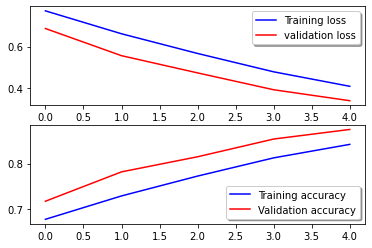

In [43]:

# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history_LSTM_CNN .history['loss'], color='b', label="Training loss")
ax[0].plot(history_LSTM_CNN .history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history_LSTM_CNN.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_LSTM_CNN.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

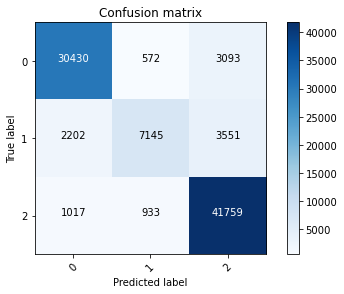

In [44]:
# Defining function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))